<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-star.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
matplotlib.rcParams['font.size'] = 12

import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
toiid=1063

#initialize
star = cr.Star(toiid=toiid)

Target: TOI 1063
Searching Vizier: (230.555 -83.0562) with radius=3.0 arcsec


# stellar parameters

## isochrones

In [3]:
iso_params = star.get_iso_params()
iso_params

Querying Gaia DR2 catalog for ra,dec=(230.555 -83.0562) within 3.0 arcsec.
Querying TIC catalog for ra,dec=(230.555 -83.0562) within 3.0 arcsec.
Gaia and TIC catalog cross-match succeeded.


{'parallax': [16.332310962617218, 0.1035314124863975],
 'TESS': [9.0689, 0.01],
 'G': [9.588498, 0.01],
 'BP': [10.0314417, 0.01],
 'RP': [9.027062, 0.01],
 'J': [8.352, 0.027],
 'H': [7.997, 0.036],
 'K': [7.858, 0.036],
 'W1': [7.82, 0.03],
 'W2': [7.88, 0.02],
 'W3': [7.82, 0.02]}

In [7]:
model = star.run_isochrones(iso_params=iso_params, n_live_points=2000, overwrite=True)

Using previously initialized model.
Overwriting previous run.
method: Nested Sampling
Initial values:
logpost = loglike+logprior = -1936968.93 + -15.89 = -1936984.82
Final values:
logpost = loglike+logprior = -68.67 + -11.25 = -79.92
  analysing data from ./chains/TOI 1063-mist-single-.txt
Model evidence: (-97.97550507541501, 0.12503095284617258)


In [4]:
# star.save_star_ini()
# star.save_fpp_ini()

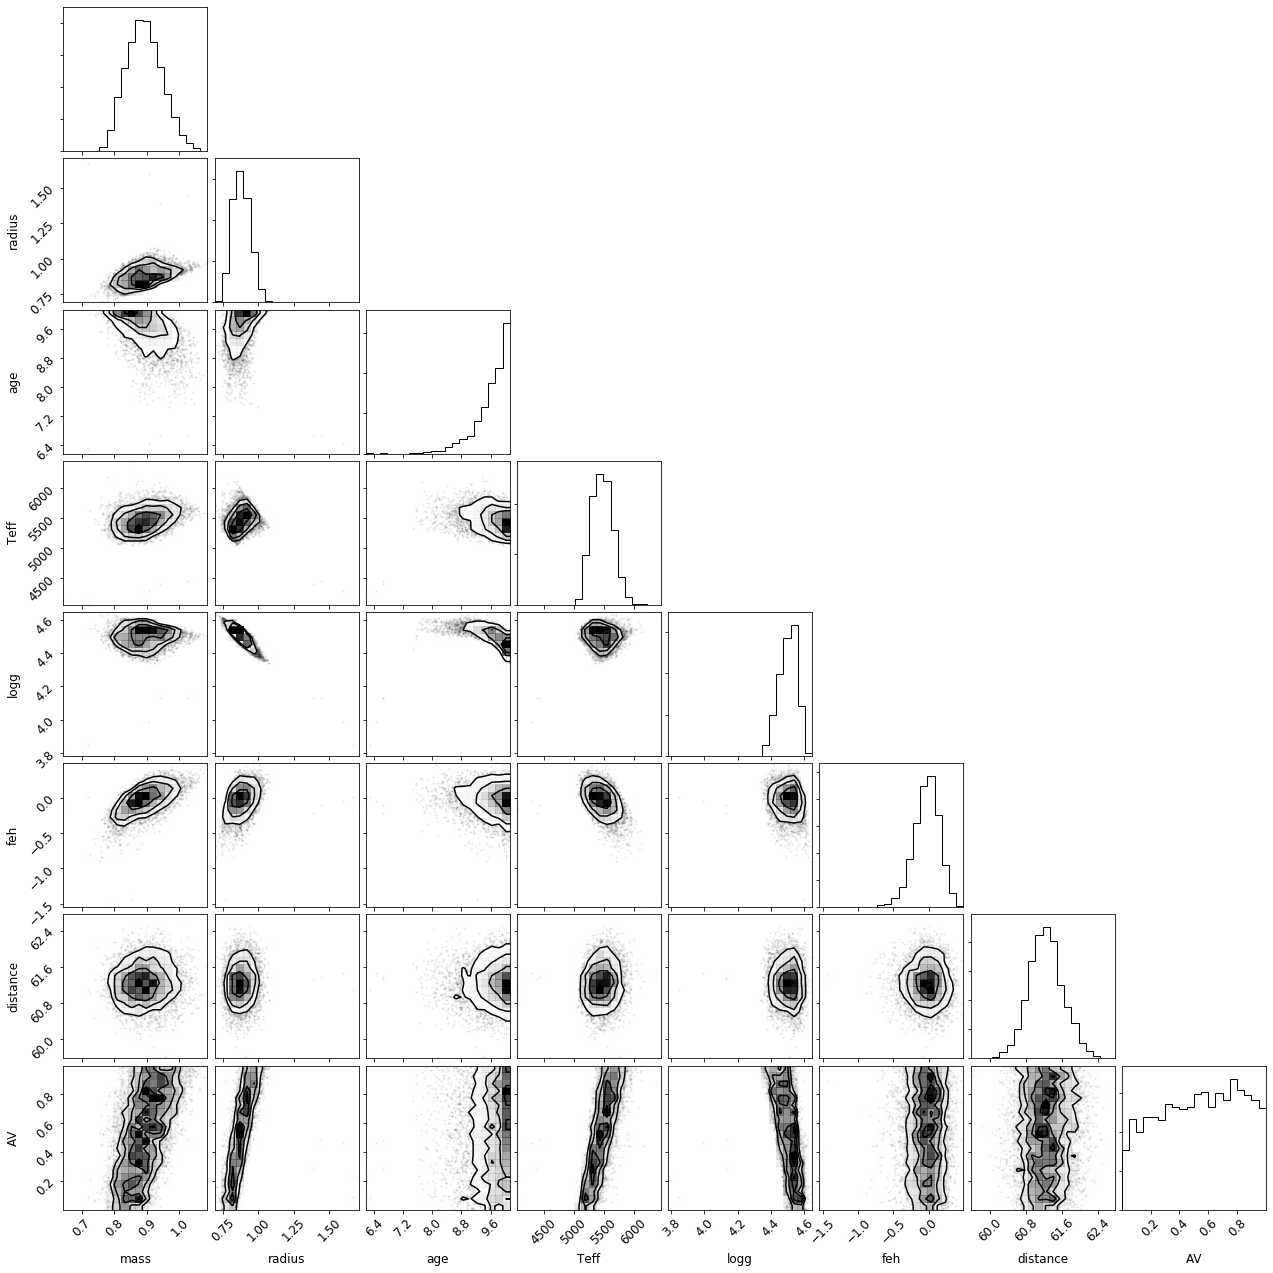

In [5]:
fig = star.plot_corner(use_isochrones=True, posterior='physical')

In [10]:
star.get_isochrones_results()

eep        age       feh      mass  initial_mass    radius  \
0     331.808586   9.411642 -0.101217  0.954045      0.954117  0.904280   
1     356.620722   9.790027 -0.073834  0.917779      0.917931  0.929897   
2     332.929152   9.471169 -0.351858  0.888392      0.888466  0.842275   
3     279.986136   8.667802  0.095746  1.016717      1.016731  0.918805   
4     120.995538   6.172343 -0.156752  0.642959      0.642959  1.706105   
...          ...        ...       ...       ...           ...       ...   
5277  360.451546   9.969555  0.044186  0.846000      0.846139  0.852091   
5278  356.633525   9.975338 -0.000218  0.827308      0.827439  0.830920   
5279  358.911667   9.986018 -0.037331  0.823744      0.823881  0.832759   
5280  371.429450  10.079596 -0.054976  0.805994      0.806156  0.836473   
5281  369.066645  10.053776 -0.050872  0.813670      0.813828  0.839636   

       density   logTeff         Teff      logg  ...     BP_mag    RP_mag  \
0     1.822274  3.761239  5771.769298  4.505157  ...  10.063669  8.880905   
1     1.610784  3.751920  5648.960922  4.463793  ...  10.109770  8.892623   
2     2.102054  3.765422  5827.358671  4.535897  ...  10.082510  8.995142   
3     1.852968  3.757101  5716.838432  4.519069  ...  10.086087  8.917409   
4     0.183360  3.609249  4067.069646  3.781981  ...  10.410334  8.742276   
...        ...       ...          ...       ...  ...        ...       ...   
5277  1.929271  3.716336  5204.876722  4.502518  ...  10.041879  8.977238   
5278  2.034557  3.712906  5163.683442  4.513983  ...  10.021514  8.991628   
5279  2.012170  3.715358  5192.560635  4.509835  ...  10.023319  8.989392   
5280  1.943040  3.712503  5158.588227  4.496319  ...  10.031672  8.995438   
5281  1.938467  3.714525  5182.462450  4.497153  ...  10.023312  8.982853   

        W1_mag    W2_mag    W3_mag  TESS_mag  Kepler_mag   parallax  \
0     7.430581  7.426238  7.372126  8.862301    9.462416  16.770198   
1     7.390923  7.392247  7.331767  8.873190    9.488359  16.785094   
2     7.657329  7.648075  7.603890  8.979496    9.534975  16.104948   
3     7.506953  7.513656  7.456177  8.900280    9.488885  15.934730   
4     6.522098  6.575929  6.455556  8.711329    9.524366  16.451651   
...        ...       ...       ...       ...         ...        ...   
5277  7.685270  7.726083  7.660314  8.966505    9.490677  16.363418   
5278  7.741403  7.784919  7.720983  8.982141    9.487908  16.376923   
5279  7.730627  7.770749  7.707928  8.979486    9.488801  16.394786   
5280  7.729022  7.770401  7.706659  8.985573    9.495622  16.386130   
5281  7.712284  7.752126  7.688727  8.972728    9.485513  16.420303   

       distance        AV  
0     59.629587  0.927676  
1     59.576670  0.921831  
2     62.092718  0.749917  
3     62.756007  0.835712  
4     60.784171  0.232180  
...         ...       ...  
5277  61.111926  0.172512  
5278  61.061532  0.055274  
5279  60.995002  0.097692  
5280  61.027224  0.074019  
5281  60.900215  0.106295  

[5282 rows x 30 columns]

## stardate

In [8]:
star.run_stardate(iso_params=iso_params, nsteps=5000)

  0%|          | 12/5000 [00:00<00:44, 112.96it/s]

Input parameters:
{'Av': [0.34590287134051323, 0.01],
 'G': [9.588498, 0.01],
 'bp': [10.0314417, 0.01],
 'parallax': [16.332310962617218, 0.1035314124863975],
 'rp': [9.027062, 0.01]}
Init isochrones parameters:
{'Av': 0.0045,
 'EEP': 329.58,
 '[Fe/H]': -0.0478,
 'ln(Distance)': 5.560681631015528,
 'log10(Age [yr])': 9.5596}
Automatically setting burn in to 166


100%|██████████| 5000/5000 [00:38<00:00, 128.78it/s]

nsteps 5000 burnin 166


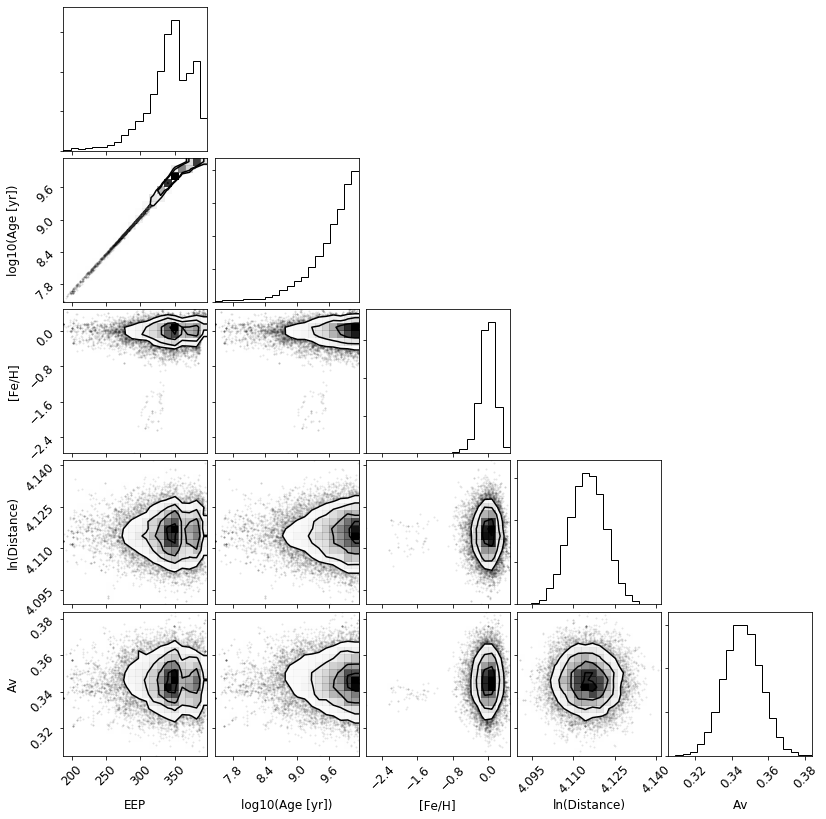

In [9]:
fig = star.plot_corner(use_isochrones=False)

# extinction

In [3]:
star.estimate_Av(map='sfd')

0.34590287134051323

In [4]:
star.estimate_Av(map='planck')

0.3179775469005108

# spectral type

In [5]:
#uses Monte Carlo 
spec_types, samples = star.get_spectral_type(return_samples=True)
spec_types

Loaded: /home/jp/github/research/project/chronos/chronos/../data/mamajek_table.csv
Querying Gaia DR2 catalog for ra,dec=(230.555 -83.0562) within 3.0 arcsec.
Querying TIC catalog for ra,dec=(230.555 -83.0562) within 3.0 arcsec.


'G9V'

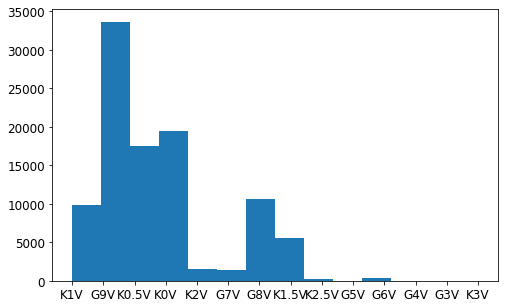

In [7]:
import matplotlib.pyplot as pl

#plot
fig = pl.figure(figsize=(8,5))
nbins= len(np.unique(samples))
pl.hist(samples, bins=nbins);

# stellar inclination 

In [3]:
star.get_inclination()

Found 0 references with Prot
No Prot found in literature. Provide Prot.
Found 0 references with vsini
No vsini found in literature. Provide vsini.
Querying Gaia DR2 catalog for ra,dec=(230.555 -83.0562) within 3.0 arcsec.
Choose input for Rstar:
{'ticv8': 0.8043779999999999, 'gaia DR2': 0.775068164}


# See also
* examples-star-isochrones.ipynb